<a href="https://colab.research.google.com/github/Tanjul5/Speech-Emotion-Recognition/blob/main/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SPEECH EMOTION RECOGNITION**


TABLE OF CONTENTS

PROBLEM STATEMENT

INTRODUCTION

EXPLORATORY DATA ANALYSIS (EDA)

DATA AUGMENTATION

FEATURE EXTRACTION

MODEL

# **INTRODUCTION**

Verbal Communication is valuable and sought after in workplace and classroom environments alike.
There is no denying the notion that Indians lack verbal communication and consequently lag behind in
the workplace or classroom environments. This happens despite them having strong technical
competencies. Clear and comprehensive speech is the vital backbone of strong communication and
presentation skills. Where some occupations consist mainly of presenting, most careers require and
thrive from the ability to communicate effectively. Research has shown that verbal communication
remains one of the most employable skills in both the perception of employers and new graduates. Of
the possible improvements to vocal presentations tone, disfluencies, and stutters, in particular, remain
one of the most common and prominent factors of someone’s demonstration. Millions of people are
affected by stuttering and other speech disfluencies, with the majority of the world having experienced
mild stutters while communicating under stressful conditions. Research shows that mild disfluencies
can be cured without medical help, just practicing speech regularly and constructive feedbacks are
effective ways to improve.
We, Data Scientists recognize this problem and say hello.


# **PROBLEM STATEMENT**

We will solve the above-mentioned problem by applying deep learning algorithms to audio/speech
data. The solution will be to identify emotions in speech.


DATA SOURCE USED

We have used the RAVDESS dataset in this project.It is one of the more common dataset used for this excercise by others. It's well liked because of its quality of speakers, recording and it has 24 actors of different genders. Here's the filename identifiers as per the official RAVDESS website:

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Here's an example of an audio filename. 02-01-06-01-02-01-12.mp4

Video-only (02)

Speech (01)

Fearful (06)

Normal intensity (01)

Statement “dogs” (02)

1st Repetition (01)

12th Actor (12)

Female, as the actor ID number is even.

**Analysis**

We are using Google Colab, a Google Cloud environment for jupyter, so we need to import our files from Google Drive and then install LibROSA, a python package for music and audio analysis.

After the import, we will plot the signal of the first file.

# **Importing Libraries**

In [1]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import keras
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD



import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#mounting the google drive to import the dataset

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [25]:
# path to the directory
RAVD = "/content/drive/MyDrive/SPEECH_EMOTION_RECOGNITION/data/"

# **Data Preprocessing**

Text(0.5, 1.0, 'Waveplot - Male Happy')

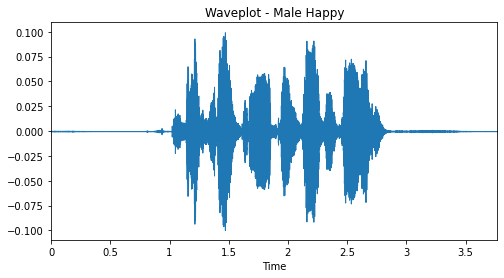

In [26]:
# DISPLAY WAVEPLOT
x, sr = librosa.load(f'/{RAVD}/Actor_03/03-01-03-01-01-01-03.wav')

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Happy')

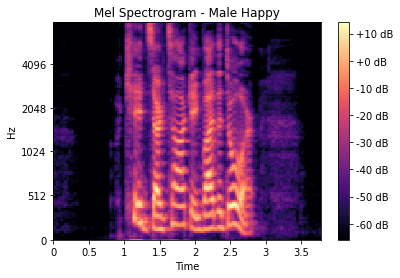

In [27]:
# CREATE LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
x = librosa.power_to_db(x)

librosa.display.specshow(x, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Happy')
plt.colorbar(format='%+2.0f dB');

**Male Angry**

Text(0.5, 1.0, 'Waveplot - Male Angry')

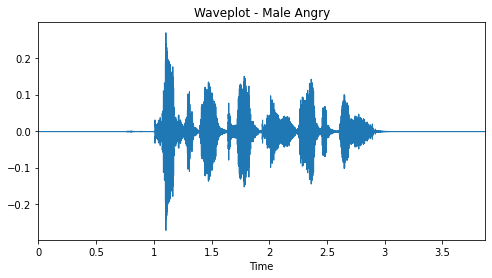

In [28]:
# LOAD FILE
x, sr = librosa.load(f'/{RAVD}/Actor_05/03-01-05-01-01-01-05.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Male Angry')

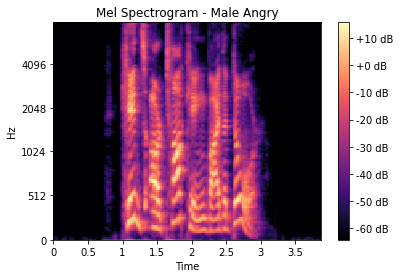

In [29]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Angry');
plt.colorbar(format='%+2.0f dB');

**Female Fearful**

Text(0.5, 1.0, 'Waveplot - Female Fearful')

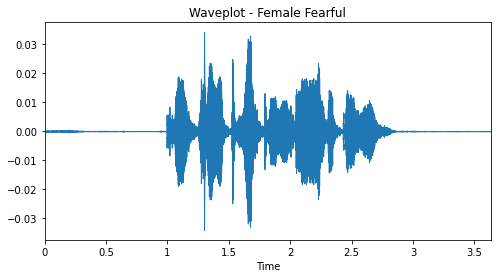

In [30]:
# LOAD FILE
x, sr = librosa.load(f'/{RAVD}/Actor_06/03-01-06-01-01-01-06.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - Female Fearful')

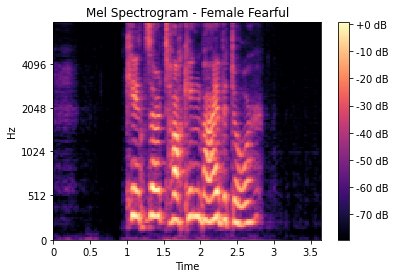

In [31]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fearful')
plt.colorbar(format='%+2.0f dB');

**Female Surprised**

Text(0.5, 1.0, 'Waveplot - FemaleSurprised')

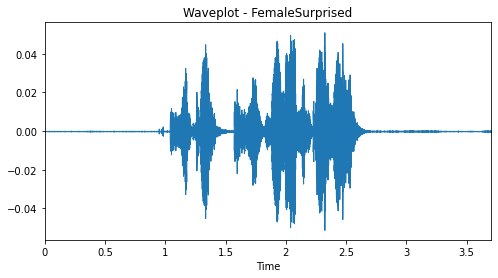

In [32]:
# LOAD FILE
x, sr = librosa.load(f'/{RAVD}/Actor_08/03-01-08-01-01-01-08.wav')
# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveplot(x, sr=sr)
plt.title('Waveplot - FemaleSurprised')

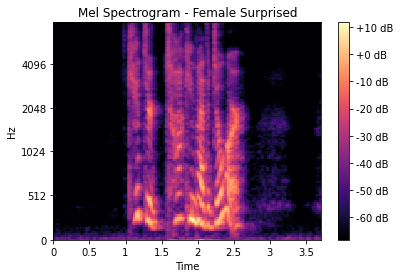

In [33]:
# DISPLAY LOG MEL SPECTROGRAM
x = librosa.feature.melspectrogram(y=x, sr=sr,n_mels=128,fmax=8000) 
y = librosa.power_to_db(x)

librosa.display.specshow(y, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Surprised')
plt.colorbar(format='%+2.0f dB');

So in above plots we have created a Waveplots and Mel Spectrograms for different emotions classifications.

In [34]:
# CREATE DIRECTORY OF AUDIO FILES 
actor_folders = os.listdir(RAVD) #list files in audio directory
actor_folders.sort() 

**we have converted audio speech files into List dtype.**

In [36]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER, ACTOR AND GENDER LABEL
emotion = []
gender = []
actor = []
file_path = []
for i in actor_folders:
    filename = os.listdir(RAVD + i) #iterate over Actor folders
    for f in filename: # go through files in Actor folder
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        actor.append(int(part[6]))
        bg = int(part[6])
        if bg%2 == 0:
            bg = "female"
        else:
            bg = "male"
        gender.append(bg)
        file_path.append(RAVD + i + '/' + f)

In [41]:
# PUT EXTRACTED LABELS WITH FILEPATH INTO DATAFRAME
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df = pd.concat([pd.DataFrame(gender),audio_df,pd.DataFrame(actor)],axis=1)
audio_df.columns = ['gender','emotion','actor']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
audio_df.head()

,gender,emotion,actor,path
0,male,neutral,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
1,male,neutral,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
2,male,calm,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
3,male,calm,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...
4,male,calm,1,/content/drive/MyDrive/SPEECH_EMOTION_RECOGNIT...


So we have extracted the audio speech files path and created a DataFrame out of it.

In [42]:
#shape of the dataframe
audio_df.shape

(1440, 4)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


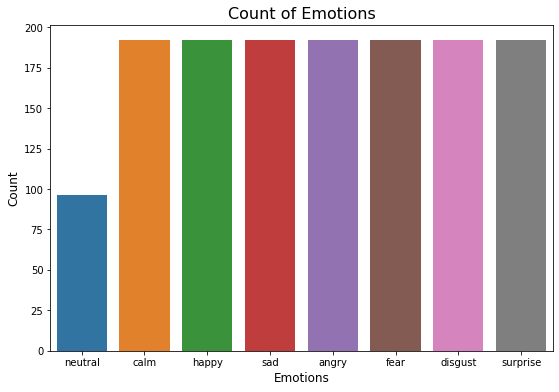

In [44]:
plt.figure(figsize=(9,6))
plt.title('Count of Emotions', size=16)
sns.countplot(audio_df.emotion)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
# sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# **DATA AUGMENTATION**

Data augmentation is the process by which we create new polymerized data samples by adding small disturbance on our initial training set.
To generate polymerized data for audio, we can apply noise injection, shifting time, changing pitch and speed.
The objective is to make our model invariant to those disturbance and enhace its ability to generalize. In order to this to work adding the disturbance must conserve the same label as the original training sample.

In [45]:
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [47]:
# Trying different functions above
path = np.array(audio_df['path'])[471]
data, sample_rate = librosa.load(path)

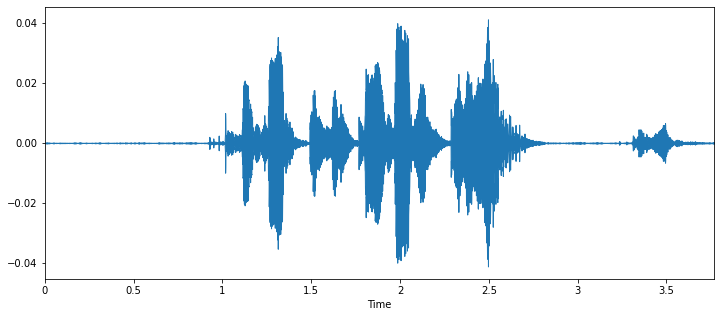

In [48]:
# NORMAL AUDIO
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=data, sr=sample_rate)
Audio(path)

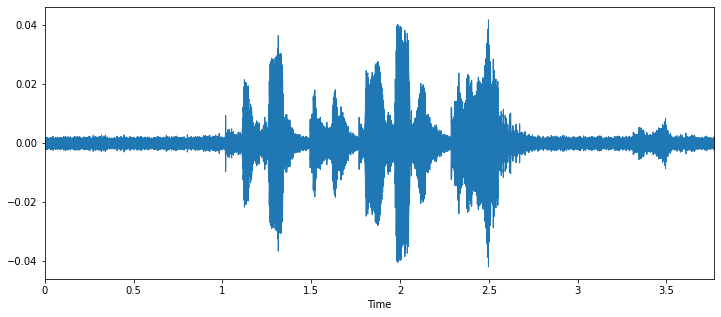

In [49]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

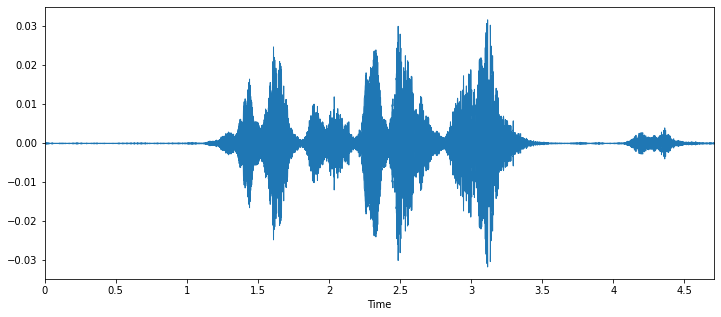

In [50]:
# STRETCHED AUDIO
x = stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

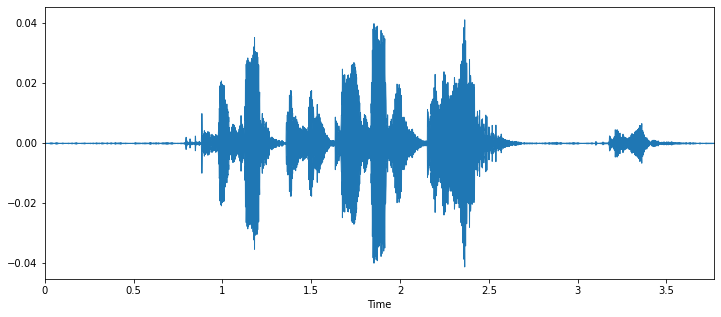

In [51]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

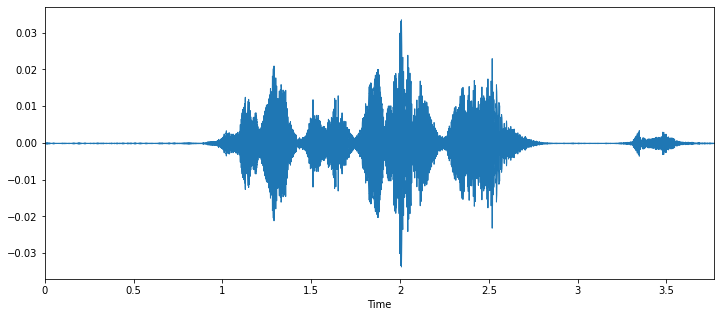

In [52]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveplot(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

After listening to all audio we determine to use noise, shift and stretch